In [1]:
n=3

In [2]:
import numpy as np
import random as rd

In [3]:
def grille(n):
    a=np.zeros((n,n),dtype=int)
    k=1
    r=1
    for i in range(n):
        if i==k:
            for j in range(n):
                if j==r:
                    a[i,j]=1
    return a

In [4]:
grille(3)

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [159]:


import numpy



In [160]:
M=grille(n)
M

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [292]:
def etat_incubation1(M, p1, p2, x, y, pas, dictio):
    assert M.shape[0] == M.shape[1]
    n = M.shape[0]
    
    resultat = M
    
    L = [(1,0),(-1,0),(0,1),(0,-1),(1,-1),(1,1),(-1,1),(-1,-1)]
    voisin_infecte = 0

    if M[x, y] == 2:  # i.e. personne rétablie
        resultat[x, y] = 2  # reste rétablie
    elif M[x, y] == 3:  # i.e personne décédée
        resultat[x, y] = 3  # reste décédée
    elif M[x, y] == 0:  # i.e. personne saine        
        for (dx, dy) in L:  # pour chaque voisin
            if x+dx < n and x+dx >= 0 and y+dy < n and y+dy >= 0:  # i.e. gestion des bords
                if M[x+dx, y+dy] == 1:  # i.e. voisin infecté
                    # if numpy.random.random() <= p2:
                        voisin_infecte += 1

    # Gérer l'infection de la personne.
    if voisin_infecte > 0:
        #r = 0  # initialisation du résultat
        #for k in range(0, voisin_infecte):  # pour chaque voisin infecté
            #x = np.random.binomial(1, p2)  # 1 si le voisin k m'infecte, 0 sinon
            #r = max(r, x)  # mis à jour du résultat
        #resultat[x, y] = r  # infecter la personne
        if numpy.random.random() <= p2:
            #print((x,y), "tombe malade")
            resultat[x,y]=1

    # if resultat[1, 1] == 1:
    #     print("infecté")
    # else:
    #     print("non infecté")
    
    
   
    # Gérer l'incubation de la personne.
    if resultat[x, y] == 1 :  # i.e. infectée
        # Incrémente le compteur de tous les malades : dictio = dict()
        if (x, y) in dictio:
            #print((x, y))
            dictio[(x, y)] = dictio[(x, y)] + 1   # On entre en incubation 
        else:
            # Nouvel infecté : on le rajoute au dictionnaire
            dictio[(x, y)] = 1
        #print((x,y), dictio[(x,y)])
    
   
    # En incubation depuis "pas" tours : on devient soit rétabli soit décédé selon une propabilité  p1

    if (x, y) in dictio and dictio[(x, y)] >= pas:
        if numpy.random.random() <= p1:
            resultat[x, y] = 3  # décédé
        else:
            resultat[x, y] = 2  # rétabli
        dictio.pop((x, y))
    
    return resultat, dictio

In [284]:
M = grille(n)
res = simulation(5)
for x in res:
    print(x)

(0, 1) 1
(1, 1) 2
(2, 2) 1
(3, 1) 1
(0, 1) 2
(0, 2) 1
(1, 0) 1
(1, 1) 3
(1, 3) 1
(2, 2) 2
(2, 3) 1
(3, 1) 2
(3, 3) 1
(0, 1) 3
(0, 2) 2
(0, 3) 1
(1, 0) 2
(1, 1) 4
(1, 2) 1
(1, 3) 2
(2, 1) 1
(2, 2) 3
(2, 3) 2
(3, 0) 1
(3, 1) 3
(3, 3) 2
(0, 0) 1
(0, 1) 4
(0, 2) 3
(0, 3) 2
(1, 0) 3
(1, 1) 5
(1, 2) 2
(1, 3) 3
(2, 0) 1
(2, 1) 2
(2, 2) 4
(2, 3) 3
(3, 0) 2
(3, 1) 4
(3, 2) 1
(3, 3) 3
(0, 0) 2
(0, 1) 5
(0, 2) 4
(0, 3) 3
(1, 0) 4
(1, 2) 3
(1, 3) 4
(2, 0) 2
(2, 1) 3
(2, 2) 5
(2, 3) 4
(3, 0) 3
(3, 1) 5
(3, 2) 2
(3, 3) 4
(0, 0) 3
(0, 2) 5
(0, 3) 4
(1, 0) 5
(1, 2) 4
(1, 3) 5
(2, 0) 3
(2, 1) 4
(2, 3) 5
(3, 0) 4
(3, 2) 3
(3, 3) 5
[[0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]]
[[0 1 1 0]
 [1 1 0 1]
 [0 0 1 1]
 [0 1 0 1]]
[[0 1 1 1]
 [1 1 1 1]
 [0 1 1 1]
 [1 1 0 1]]
[[1 1 1 1]
 [1 2 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[1 3 1 1]
 [1 2 1 1]
 [1 1 3 1]
 [1 2 1 1]]


In [285]:
p1 = 0.5
n = 3
p2 = 0.5
M = grille(n)
pas = 4
d = {(1,1):1}

In [286]:
M=grille(n)
M

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [293]:
def next_step_incubation(M,d):
    #d = {(1,1):1}
    #resultat=grille(n)
   # print(M)d = {(1,1):1}
    #print(d)
    for i in range(n):
        for j in range(n):
            M, d = etat_incubation1(M, p1, p2, i, j, pas, d)
             
            #print(M)
            #print(d)
    
    return M

In [294]:
next_step_incubation(M,{(1,1):1})

array([[0, 1, 1, 1],
       [1, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0]])

In [295]:
p1=0.4
n=4
p2=0.5
M=grille(n)
pas=5

In [296]:
def simulation(max_itere=10, n = 4):
    cpt=0
    M = grille(n)
    D= dict()
    D={(1,1):1}
    resultat=[] 
    resultat.append((M).copy())
    new_state=next_step_incubation(M,D)
    while(cpt<max_itere):
        resultat.append((new_state).copy())
        new_state= next_step_incubation(new_state,D)
        cpt = cpt+1
        
    return resultat

In [298]:
res1=simulation(6)
for x in res1:
    print(x)

[[0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 0 1 0]
 [1 1 1 0]
 [1 0 1 1]
 [1 0 1 0]]
[[1 0 1 0]
 [1 1 1 0]
 [1 1 1 1]
 [1 1 1 1]]
[[1 0 1 0]
 [1 1 1 0]
 [1 1 1 1]
 [1 1 1 1]]
[[1 0 1 1]
 [1 2 1 0]
 [1 1 1 1]
 [1 1 1 1]]
[[3 1 2 1]
 [2 2 2 1]
 [2 1 3 2]
 [3 1 3 1]]
[[3 1 2 1]
 [2 2 2 1]
 [2 3 3 2]
 [3 3 3 2]]


[array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]]), array([[0, 0, 1, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 0],
       [1, 1, 1, 0]]), array([[1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 0]]), array([[1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])]


<IPython.core.display.Javascript object>


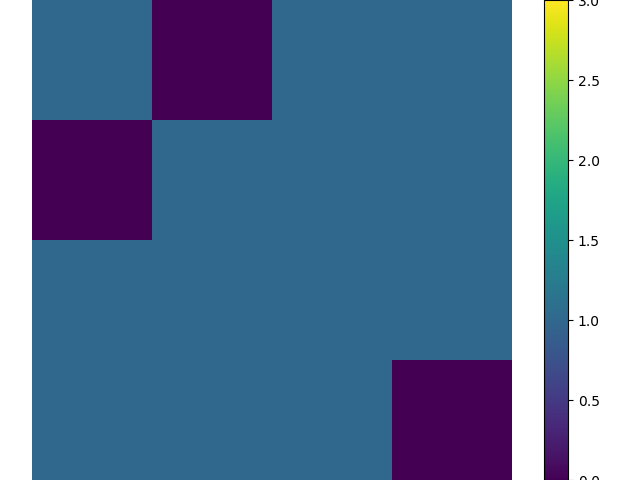

In [299]:

%matplotlib notebook
from pylab import *
import numpy as np


x=0
y=0


def simulation(max_itere=n-1):
    M=grille(n)
    cpt=0
    resultat=[M.copy()]
    new_state=next_step_incubation(M,d)
    
    while (cpt < max_itere):
        resultat.append(new_state.copy())
        new_state= next_step_incubation(new_state,d)
        cpt = cpt+1
    
    return resultat

resultat_final = simulation(max_itere=n-1)

print(resultat_final)


import matplotlib.pyplot as plt
size = np.array(M.shape)
dpi = 10.0 
figsize= size[1]/float(dpi),size[0]/float(dpi)
#fig = plt.figure(figsize = figsize, dpi = dpi, facecolor = "white")
fig = plt.figure(facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)
im=plt.imshow(M, interpolation = 'nearest', cmap ="viridis", vmin=0, vmax=3)
plt.xticks([]), plt.yticks([])
plt.colorbar()


import matplotlib.animation as animation

def update(i):
    #simulation_4param(max_itere=10)
    M = resultat_final[i]
    im.set_array(M)
    return im,

ani = animation.FuncAnimation(fig, update, frames=len(resultat_final), interval=500)
plt.show()